Author : Vishal Jha
Date : 16/06/2021

In [33]:
%matplotlib inline
""" Libraries """
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing dataset

In [2]:
data = pd.read_csv("/Users/vishaljha/Desktop/GS YAY AI class/Hands-on session/Dataset.csv")

In [3]:
y = data["label"]
X = data.drop(labels=["label"], axis=1)

In [4]:
y[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

# Checking for null values if present

In [5]:
null_values = X.isnull().any().describe()
null_values

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalization of data, converting it to grayscale type

In [7]:
X = X / 255.
X[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reshaping the data into a 3D matrix for color channel identification

In [8]:
X = X.values.reshape(-1, 28, 28, 1)

# Label encoding the y values using one-hot encoding vectors, as there is no ordinal relationship between them

In [9]:
y[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
y = to_categorical(y, num_classes=10)
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Spliting the dataset into train, test and validation dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=0)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.45, random_state= 2)

In [17]:
len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val)

(15477, 13860, 12663, 15477, 13860, 12663)

# Model architecture definition, CNN Model

In [14]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (5,5), padding= 'Same', activation= 'relu', input_shape= (28,28,1)))

model.add(Conv2D(filters= 32, kernel_size= (5,5), padding= 'Same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.33))

model.add(Conv2D(filters= 64, kernel_size= (3,3), padding= 'Same', activation= 'relu'))
model.add(Conv2D(filters= 64, kernel_size= (3,3), padding= 'Same', activation= LeakyReLU()))
model.add(MaxPool2D(pool_size= (2,2), strides= (1,1)))
model.add(Dropout(0.33))

model.add(Conv2D(filters= 128, kernel_size= (2,2), padding= 'Same', activation= 'relu'))
model.add(Conv2D(filters= 128, kernel_size= (2,2), padding= 'Same', activation= LeakyReLU()))
model.add(MaxPool2D(pool_size= (2,2), strides= (1,1)))
model.add(Dropout(0.33))

model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.55))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer= 'Adamax', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Using an image augmentator to increase the dataset size by manipulating/augmenting images by rotating and zooming in.

In [18]:
image_augmentor = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False)

image_augmentor.fit(X_train)

## Training

In [21]:
model_history = model.fit(image_augmentor.flow(X_train, y_train, batch_size=128), epochs=15, validation_data=(X_val, y_val), verbose=2, steps_per_epoch=X_train.shape[0]//128)

Epoch 1/15
120/120 - 44s - loss: 0.5051 - accuracy: 0.8429 - val_loss: 0.1241 - val_accuracy: 0.9623
Epoch 2/15
120/120 - 44s - loss: 0.2815 - accuracy: 0.9139 - val_loss: 0.0931 - val_accuracy: 0.9701
Epoch 3/15
120/120 - 45s - loss: 0.2255 - accuracy: 0.9330 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 4/15
120/120 - 46s - loss: 0.1872 - accuracy: 0.9457 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 5/15
120/120 - 50s - loss: 0.1601 - accuracy: 0.9528 - val_loss: 0.0764 - val_accuracy: 0.9761
Epoch 6/15
120/120 - 53s - loss: 0.1469 - accuracy: 0.9564 - val_loss: 0.0661 - val_accuracy: 0.9816
Epoch 7/15
120/120 - 55s - loss: 0.1312 - accuracy: 0.9601 - val_loss: 0.0609 - val_accuracy: 0.9829
Epoch 8/15
120/120 - 59s - loss: 0.1217 - accuracy: 0.9635 - val_loss: 0.0561 - val_accuracy: 0.9839
Epoch 9/15
120/120 - 63s - loss: 0.1149 - accuracy: 0.9652 - val_loss: 0.0469 - val_accuracy: 0.9860
Epoch 10/15
120/120 - 70s - loss: 0.1096 - accuracy: 0.9674 - val_loss: 0.0493 - val_accura

# Saving the model

In [22]:
model.save('digit.h5')

In [24]:
predictor = load_model('/Users/vishaljha/Desktop/GS YAY AI class/Hands-on session/digit.h5')

# Model analysis for loss and accuracy on training and validation set

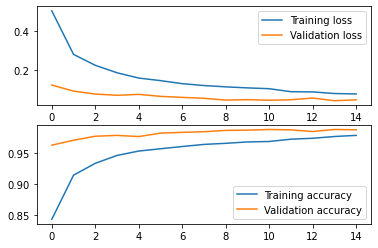

In [32]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(model_history.history['loss'], label= "Training loss")
ax[0].plot(model_history.history['val_loss'], label= "Validation loss", axes= ax[0])
legend = ax[0].legend(loc= 'best')

ax[1].plot(model_history.history['accuracy'], label= "Training accuracy")
ax[1].plot(model_history.history['val_accuracy'], label= "Validation accuracy")
legend = ax[1].legend(loc= 'best')

# Model analysis on test data

In [36]:
Y_pred = predictor.predict(X_test)

In [37]:
Y_pred

array([[1.10509952e-11, 6.39995348e-11, 5.17514076e-09, ...,
        8.38004688e-09, 3.36944916e-09, 1.16117135e-07],
       [4.62931631e-08, 5.09401366e-09, 7.85610688e-10, ...,
        1.73414018e-12, 1.21539117e-08, 3.24904881e-10],
       [2.46680454e-11, 9.50460630e-13, 4.45478984e-12, ...,
        7.97039679e-09, 7.55629725e-10, 9.99999881e-01],
       ...,
       [9.99659061e-01, 7.35843955e-08, 2.20348011e-05, ...,
        7.57936448e-07, 2.44025039e-04, 4.67133359e-05],
       [7.26833253e-13, 2.81199397e-10, 1.37100620e-09, ...,
        1.30287265e-08, 4.00585565e-09, 3.35015699e-07],
       [1.49171385e-07, 8.19119794e-09, 9.99999285e-01, ...,
        2.09374235e-07, 2.98515213e-10, 5.11560405e-10]], dtype=float32)

In [40]:
errors = (Y_pred - y_test != 0)
errors

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])